In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [6]:
df1= df[['company','salary_more_then_100k']]
df1

,company,salary_more_then_100k
0,google,0
1,google,0
2,google,1
3,google,1
4,google,0
5,google,1
6,abc pharma,0
7,abc pharma,0
8,abc pharma,0
9,abc pharma,1


In [8]:
df2= pd.get_dummies(df1,dtype='int')
df2

,salary_more_then_100k,company_abc pharma,company_facebook,company_google
0,0,0,0,1
1,0,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,0,0,1
5,1,0,0,1
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,1,1,0,0


In [38]:
from sklearn.linear_model import LogisticRegression
X= df2.drop(columns=['salary_more_then_100k'])
Y= df2[['salary_more_then_100k']]

In [48]:
model= LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [49]:
ans= model.predict([[0,0,1]])
print(ans)

[1]


In [50]:
model.score(X,Y)

0.75

In [24]:
n= int(input('Enter no of details: '))
for i in range(1,n+1):
    comp= input('Enter company name: ')
    if comp=='google':
        ans= model.predict([[0,0,1]])
        print(ans)
    elif comp=='abc pharma':
        ans= model.predict([[1,0,0]])
        print(ans)
    elif comp=='facebook':
        ans= model.predict([[0,1,0]])
        print(ans)     

Enter no of details:  3
Enter company name:  google


[1]


Enter company name:  facebook


[1]


Enter company name:  abc pharma


[0]


<Axes: xlabel='company_abc pharma'>

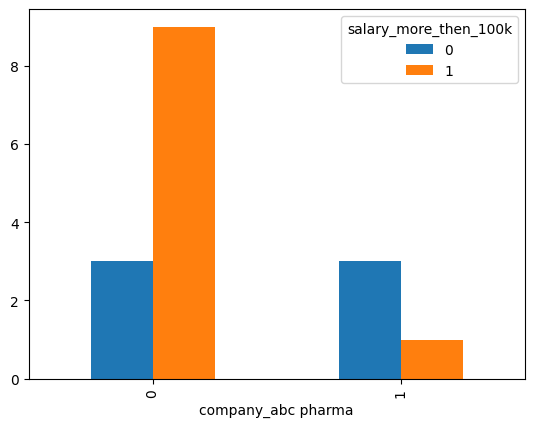

In [34]:
pd.crosstab(df2['company_abc pharma'],df2['salary_more_then_100k']).plot(kind='bar')

<Axes: xlabel='company_google'>

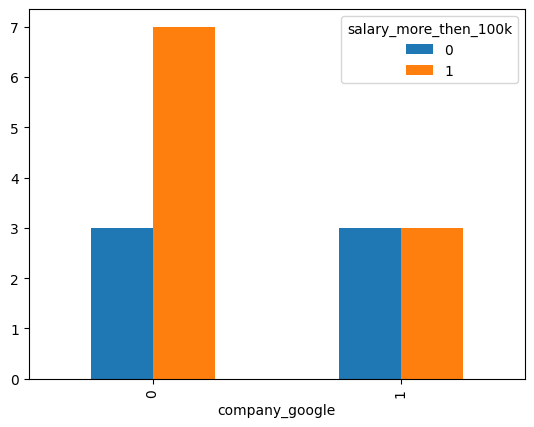

In [35]:
pd.crosstab(df2['company_google'],df2['salary_more_then_100k']).plot(kind='bar')

<Axes: xlabel='company_facebook'>

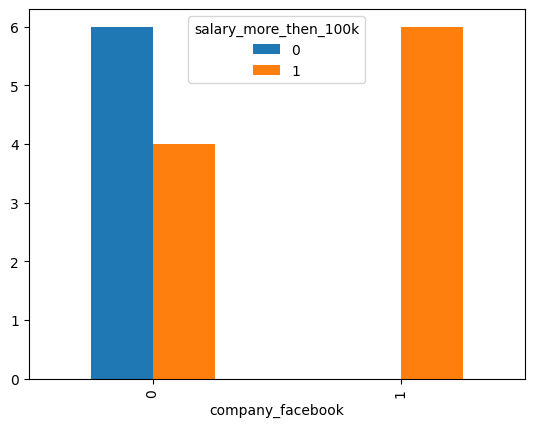

In [36]:
pd.crosstab(df2['company_facebook'],df2['salary_more_then_100k']).plot(kind='bar')

In [51]:
from sklearn.tree import DecisionTreeClassifier
X1= df2.drop(columns=['salary_more_then_100k'])
Y1= df2[['salary_more_then_100k']]

In [53]:
model1= DecisionTreeClassifier()
model1.fit(X1,Y1)

DecisionTreeClassifier()

In [54]:
ans1= model1.predict([[0,0,1]])
print(ans1)

[0]


In [55]:
model1.score(X1,Y1)

0.75